In [29]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
##Import Cifar 10 model
from keras.datasets import cifar10
## Importing Kearas Libraries
import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout,BatchNormalization,LSTM
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import normalize

## Evaluation Matrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading Cifar Dataset

In [2]:
cifar10 = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


## Spliting the dataset

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10

In [4]:
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  50000
X_test:  10000
y_train:  50000
y_test:  10000


## Reshaping the Dataset

In [5]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 3))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 3))

## Converting Label into Categorical labels (Converts a class vector (integers) to binary class matrix)

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Showing Images

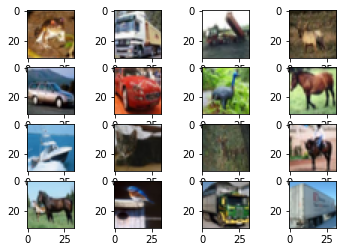

In [7]:
def img_show(X):
    plt.figure(1)
    l = 0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(X[l])
            l = l+1
    # show the plot
    plt.show()

img_show(X_train[:16]) 

## Normalize the values

In [8]:
X_train = normalize(X_train,axis = 1)
X_test = normalize(X_test,axis = 1)

## Creating the Model

In [9]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=50, input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu", kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu", kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
# 2nd Max Pooling
model.add(MaxPool2D(pool_size = (2,2), padding="valid"))
# 1st Dropout
model.add(Dropout(0.2))     
# 3rd Convolutional Layer
model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu", kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
# 4th Convolutional Layer
model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu", kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
# 2nd Max Pooling
model.add(MaxPool2D(pool_size = (2,2), padding="valid"))    
# 2nd Dropout
model.add(Dropout(0.3))
# 5th Convolutional Layer
model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu", kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
# 6th Convolutional Layer
model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu", kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())  
# 3rd Max Pooling
model.add(MaxPool2D(pool_size = (2,2), padding="valid"))
# 3rd Dropout
model.add(Dropout(0.4)) 
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1nd Fully Connected Layer
model.add(Dense(units = 50, activation = "relu"))
# Output Layer
model.add(Dense(10, activation = "softmax")) #As we have 10 classes

## Model Summary

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 50)       200       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 50)        22550     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 50)       200       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 50)       0         
 )                                                               
                                                        

## Model Optimizer

In [11]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Model EarlyStopping 

In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("cifar10.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

## Model Training

In [13]:
history = model.fit(X_train, y_train,batch_size=50,epochs=100,
              validation_data=(X_test, y_test),
              shuffle=True,callbacks=[checkpoint,early])

Epoch 1/100
 998/1000 [============================>.] - ETA: 0s - loss: 1.6407 - accuracy: 0.4122
Epoch 1: val_accuracy improved from -inf to 0.51110, saving model to cifar10.h5
1000/1000 [==============================] - 22s 11ms/step - loss: 1.6399 - accuracy: 0.4125 - val_loss: 1.4499 - val_accuracy: 0.5111
Epoch 2/100
1000/1000 [==============================] - ETA: 0s - loss: 1.1173 - accuracy: 0.6068
Epoch 2: val_accuracy improved from 0.51110 to 0.59730, saving model to cifar10.h5
1000/1000 [==============================] - 10s 10ms/step - loss: 1.1173 - accuracy: 0.6068 - val_loss: 1.1705 - val_accuracy: 0.5973
Epoch 3/100
 998/1000 [============================>.] - ETA: 0s - loss: 0.9504 - accuracy: 0.6771
Epoch 3: val_accuracy improved from 0.59730 to 0.64900, saving model to cifar10.h5
1000/1000 [==============================] - 10s 10ms/step - loss: 0.9506 - accuracy: 0.6770 - val_loss: 1.0515 - val_accuracy: 0.6490
Epoch 4/100
 999/1000 [============================>

## Checking Loss and Accuracy

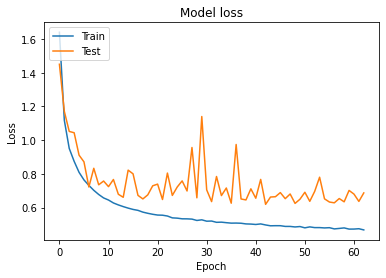

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

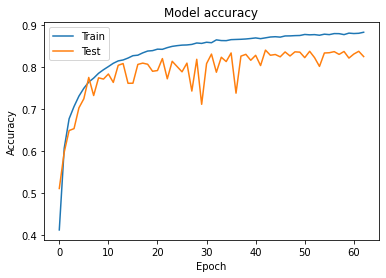

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Test Accuracy

In [16]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.6867 - accuracy: 0.8250
Test accuracy:  0.824999988079071


## Training Accuracy

In [17]:
results = model.evaluate(X_train, y_train)
print('Test accuracy: ', results[1])

1563/1563 [==============================] - 7s 4ms/step - loss: 0.3698 - accuracy: 0.9193
Test accuracy:  0.9193400144577026


## Evaluation Metrics

In [19]:
## Making Prediction
y_pred = model.predict(X_test)

In [21]:
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

In [27]:
y_true = np.array(list(map(lambda x: np.argmax(x), y_test)))

## Confusion matrix

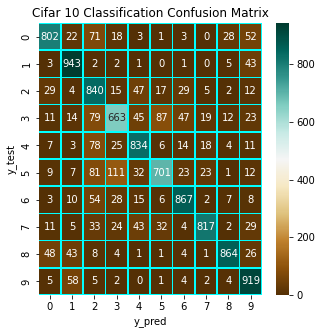

In [30]:
# Creating the confusion matrix:
e_cm = confusion_matrix(y_true, predictions)
# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(e_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Cifar 10 Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

## Prediction

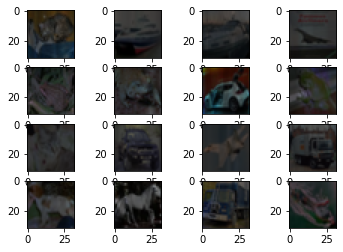

[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8]
['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship']


In [18]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(X[k])
            k = k+1
    # show the plot
    plt.show()

show_imgs(X_test[:16])
saved_model = load_model("/content/cifar10.h5")
 
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] 

indices = np.argmax(saved_model.predict(X_test[:16]),1)
print(indices)
print([labels[x] for x in indices])